In [2]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("setting"))))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("utils"))))
from utils import dataframeUtil

#import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
from random import randrange

import setting
from utils import plotUtils

In [3]:

train_df = dataframeUtil.concatenatedTowDataframe("../"+setting.shiftUptrainDatasetName,"../"+setting.trendUptrainDatasetName,setting.targetColumName_shiftup,setting.targetColumName_trendUp)
test_df = dataframeUtil.concatenatedTowDataframe("../"+setting.shiftUptestDatasetName,"../"+setting.trendUptestDatasetName,setting.targetColumName_shiftup,setting.targetColumName_trendUp)

x = train_df.iloc[:,0:setting.neuralInputsNumber].values
y = train_df.iloc[:,setting.neuralInputsNumber:setting.neuralInputsNumber+2].values

test_x = test_df.iloc[:,0:setting.neuralInputsNumber].values
test_y = test_df.iloc[:,setting.neuralInputsNumber:setting.neuralInputsNumber+2].values

d:\projekts\control-chart\utils\dataframeUtil.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = pd1.append(pd2, ignore_index=True)
d:\projekts\control-chart\utils\dataframeUtil.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = pd1.append(pd2, ignore_index=True)


In [4]:

model = keras.Sequential([
	keras.layers.Dense(256, input_shape=(setting.neuralInputsNumber,), activation='relu'),
	keras.layers.Dropout(0.4),
	keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
	keras.layers.Dropout(0.4),
	keras.layers.Dense(128, activation='relu'),
	keras.layers.Dense(2, activation='sigmoid')])

model.compile(optimizer='adam', 
	          loss=keras.losses.BinaryCrossentropy(from_logits=True),
	          metrics=['accuracy'])

model.fit(x, y, batch_size=32, epochs=50)

Epoch 1/50


C:\Users\Kal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


7/7 [==============================] - 0s 1ms/step - loss: 0.6023 - accuracy: 0.3750
Epoch 2/50
7/7 [==============================] - 0s 1ms/step - loss: 0.5192 - accuracy: 0.6250
Epoch 3/50
7/7 [==============================] - 0s 1ms/step - loss: 0.4272 - accuracy: 0.8400
Epoch 4/50
7/7 [==============================] - 0s 2ms/step - loss: 0.3604 - accuracy: 0.8500
Epoch 5/50
7/7 [==============================] - 0s 1ms/step - loss: 0.2985 - accuracy: 0.9550
Epoch 6/50
7/7 [==============================] - 0s 1ms/step - loss: 0.2598 - accuracy: 0.9450
Epoch 7/50
7/7 [==============================] - 0s 1ms/step - loss: 0.2301 - accuracy: 0.9700
Epoch 8/50
7/7 [==============================] - 0s 1ms/step - loss: 0.2602 - accuracy: 0.9200
Epoch 9/50
7/7 [==============================] - 0s 1ms/step - loss: 0.2202 - accuracy: 0.9700
Epoch 10/50
7/7 [==============================] - 0s 1ms/step - loss: 0.2057 - accuracy: 0.9650
Epoch 11/50
7/7 [==============================] -

In [6]:
print("EVALUATION")
model.evaluate(test_x, test_y)

EVALUATION
7/7 [==============================] - 0s 667us/step - loss: 3.1089e-04 - accuracy: 0.9000


[0.00031089107505977154, 0.8999999761581421]

0.0001287758  0.0001025551 
Prediction [[0. 0.]]
it should be [[0. 0.]]


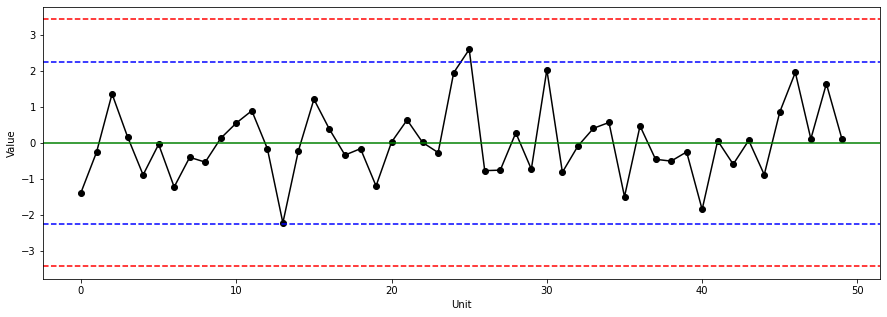

In [13]:
a = randrange((setting.generatedTrainDataOutputNumber_False + setting.generatedTrainDataOutputNumber_True -1)*2)
b = a+1
predict_x = test_df.iloc[a:b, 0:setting.neuralInputsNumber].values


#print("Prediction for", predict_x)
prediction = model.predict(predict_x)
print("%.10f " % prediction[0][0],"%.10f " % prediction[0][1])

prediction = np.round(prediction)

print("Prediction", prediction)

detection = ""
if(prediction[0][0] == 1):
    detection = "Shift"
if(prediction[0][1] == 1):
    detection = "Trend"


plotUtils.plotChart(predict_x[0], detection)

print("it should be", test_df.iloc[a:b, setting.neuralInputsNumber:setting.neuralInputsNumber+3].values)
